In [69]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.stats import linregress

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data files
internetdatafile = "internet_usage_data.xlsx"
happinessdatafile = "WHR2015-21.xlsx"

In [38]:
# Read in happiness data
happinessdata = pd.read_excel(happinessdatafile)
happinessdata.head()

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Switzerland,7.587,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402
1,Iceland,7.561,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834
2,Denmark,7.527,3,2015,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448
3,Norway,7.522,4,2015,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029
4,Canada,7.427,5,2015,10.642016,0.941860,71.443192,0.916792,0.285598,0.444144


In [49]:
# Read in internet usage data
internetdata = pd.read_excel(internetdatafile)
internetdata.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,69.000000,74.000000,78.900000,83.780000,88.661227,93.542454,97.170000,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.904114,8.940634,10.552158,13.052010,15.990277,17.165587,20.332119,23.657366,26.448284,NaN
2,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,5.454545,5.900000,7.000000,8.260000,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.663310,10.335555,12.901207,15.470625,19.421850,21.369414,24.676247,29.741679,32.418191,NaN
4,Angola,AGO,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.100000,6.500000,8.900000,21.400000,29.000000,29.000000,32.000000,35.000000,36.000000,NaN


In [54]:
# Create new empty dataframe for internet usage data
modifieddata = pd.DataFrame(columns = ["Country", "Year", "Internet Use"])

# Append a new row to the new dataframe for every row/year combination in originaal dataframe
for index, row in internetdata.iterrows():
    for year in range(2015, 2021):
        if str(year) in internetdata.columns:
            newrow = [row["Country Name"], year, row[str(year)]]
            modifieddata.loc[len(modifieddata)] = newrow

modifieddata.head()

,Country,Year,Internet Use
0,Aruba,2015,88.661227
1,Aruba,2016,93.542454
2,Aruba,2017,97.170000
3,Aruba,2018,NaN
4,Aruba,2019,NaN


In [68]:
# Merge the internet usage dataframe with the happiness dataframe and drop NaN
mergeddata = pd.merge(happinessdata, modifieddata, on=["Country", "Year"], how="left")
mergeddata.dropna(inplace=True)

# Save to csv file
mergeddata.to_csv("happiness_with_intenet_data.csv")
mergeddata.head()

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Internet Use
0,Switzerland,7.587,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402,87.479056
1,Iceland,7.561,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834,98.200000
2,Denmark,7.527,3,2015,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448,96.330502
3,Norway,7.522,4,2015,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029,96.810326
4,Canada,7.427,5,2015,10.642016,0.941860,71.443192,0.916792,0.285598,0.444144,90.000000


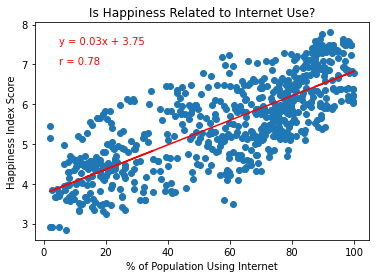

In [71]:
# Find line of regresson
(m, b, r, p, stderr) = linregress(mergeddata["Internet Use"], mergeddata["Score"])
y_regress = m * mergeddata["Internet Use"] + b

# Make scatter diagram
plt.scatter(mergeddata["Internet Use"], mergeddata["Score"])
plt.xlabel("% of Population Using Internet")
plt.ylabel("Happiness Index Score")
plt.title("Is Happiness Related to Internet Use?")

# Plot line of regression
plt.plot(mergeddata["Internet Use"], y_regress, color="red")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(5, 7.5))
plt.annotate(f"r = {r:.2f}", color="red", xy=(5, 7.0))

# Display plot
plt.show()